# Discrete Fourier Transform in 2D
Import the numpy stuff and do fft2 and ifft2 with random data:

In [12]:
import numpy as np
from numpy import sin, cos, exp, pi
from numpy.fft import fft, ifft, fft2, ifft2

a = np.random.rand(4,4)
A = fft2(a)
a_ = ifft2(A)
print('data:\n',a)
print('fourier transformed:\n',A)
print('reconstructed data:\n',a_)

data:
 [[0.19664937 0.79427392 0.11691765 0.38437797]
 [0.35429076 0.6386437  0.63696587 0.71977676]
 [0.61910068 0.39021113 0.07257858 0.53118566]
 [0.39910999 0.49242711 0.60581186 0.4717716 ]]
fourier transformed:
 [[ 7.42409262+0.j          0.13687683-0.20844388j -1.42124309+0.j
   0.13687683+0.20844388j]
 [-0.12085714-0.38055652j -0.36500179-0.47489724j -0.63536735+0.40788698j
  -0.56857896+0.62684372j]
 [-1.21350269+0.j          1.11563079-0.32939897j -0.76836172+0.j
   1.11563079+0.32939897j]
 [-0.12085714+0.38055652j -0.56857896-0.62684372j -0.63536735-0.40788698j
  -0.36500179+0.47489724j]]
reconstructed data:
 [[0.19664937+0.j 0.79427392+0.j 0.11691765+0.j 0.38437797+0.j]
 [0.35429076+0.j 0.6386437 +0.j 0.63696587+0.j 0.71977676+0.j]
 [0.61910068+0.j 0.39021113+0.j 0.07257858+0.j 0.53118566+0.j]
 [0.39910999+0.j 0.49242711+0.j 0.60581186+0.j 0.4717716 +0.j]]


"Own" fft2 and ifft2 implementation by just running fft and ifft over each axis successively:

In [14]:
def fft_2d(a):
    a = np.apply_along_axis(fft, axis=0, arr=a)
    a = np.apply_along_axis(fft, axis=1, arr=a)
    return a

def ifft_2d(a):
    a = np.apply_along_axis(ifft, axis=0, arr=a)
    a = np.apply_along_axis(ifft, axis=1, arr=a)
    return a

Show that this implemention also works:

In [15]:
a = np.random.rand(4,4)
A = fft2(a)
a_ = ifft2(A)
print('data:\n',a)
print('fourier transformed:\n',A)
print('reconstructed data:\n',a_)

data:
 [[0.74251736 0.68852237 0.70676677 0.2901008 ]
 [0.62421456 0.28711594 0.47682916 0.58706683]
 [0.9758071  0.90684974 0.87607383 0.54516812]
 [0.36040329 0.79161958 0.99570772 0.87832835]]
fourier transformed:
 [[10.73309152+0.j         -0.35243515-0.37344353j  0.78354807+0.j
  -0.35243515+0.37344353j]
 [-0.87599148+1.05083245j  0.14925943-0.81942978j  0.07079789-0.54069786j
  -0.2772248 -0.74594987j]
 [ 0.73052067+0.j          0.6234029 -1.14676286j  0.95750001+0.j
   0.6234029 +1.14676286j]
 [-0.87599148-1.05083245j -0.2772248 +0.74594987j  0.07079789+0.54069786j
   0.14925943+0.81942978j]]
reconstructed data:
 [[0.74251736+0.j 0.68852237+0.j 0.70676677+0.j 0.2901008 +0.j]
 [0.62421456+0.j 0.28711594+0.j 0.47682916+0.j 0.58706683+0.j]
 [0.9758071 +0.j 0.90684974+0.j 0.87607383+0.j 0.54516812+0.j]
 [0.36040329+0.j 0.79161958+0.j 0.99570772+0.j 0.87832835+0.j]]


Do the same for the brute force DFT:

In [16]:
def DFT_brute_force(signal, inverse=False):
    """
    Compute the DFT in "by hand"
    Implementation in Python
    Input: 
        signal    1d-numpy array
                  (preferably periodic) signal
        inverse   bool (OPTIONAL)
                  if true, compute the iDFT
    Returns:
        X         1d-numpy array
                  Fourier Transform of the 'signal'
                
    """
    N = signal.shape[0]
    X = np.zeros(signal.shape, dtype=complex)
    for k in range(N):
        for n in range(N):
            if not inverse:
                X[k] += signal[n] * exp(-2j * pi/N * k * n)
            else: 
                X[k] += signal[n] * exp(2j * pi/N * k * n)
    return X

def DFT2_brute_force(a):
    a = np.apply_along_axis(DFT_brute_force, axis=0, arr=a)
    a = np.apply_along_axis(DFT_brute_force, axis=1, arr=a)
    return a

## Run time analysis:

In [3]:
import timeit
import math
import statistics
import matplotlib.pyplot as plt
from IPython.display import HTML, display
%matplotlib notebook

def test(func, n=2**10, samples=100):
    data = np.random.rand(n,n)
    f = lambda: func(data)
    times = timeit.Timer(f).repeat(samples, 1)
    mean = statistics.mean(times)
    return mean

def O_n(n):
    return n
def O_nlogn(n):
    return n*np.log2(n)
def O_n2(n):
    return n**2
def O_n3(n):
    return n**3
    return n**2
def O_n4(n):
    return n**4

def testCycle(funcs, Os=[O_n, O_nlogn, O_n2], start=2**3, end=2**16, samples=10, verbose=False):
    n = start
    iterations = np.array([])
    times = [[] for f in funcs]
    #plt.xscale("log", basex=2)
    #plt.yscale("log")
    fig, ax = plt.subplots(1, 1)
    fig2, ax2 = plt.subplots(1, len(funcs))
    plt.ion()
    fig.show()
    fig.canvas.draw()
    while n <= end:
        row = []
        iterations = np.append(iterations, n)
        if verbose:
            ax.clear()
            ax.set_xscale('log', basex=2)
            ax.set_yscale('log')
        for i, func in enumerate(funcs):
            if verbose:
                ax2[i].clear()
                ax2[i].set_xscale('log', basex=2)
                ax2[i].set_yscale('log')
            time = test(func, n, samples)
            if time < 1e-3:
                time = test(func, n, int(samples/math.sqrt(time)))
            times[i].append(time)
            row.append(str(time))
            if verbose:
                ax.plot(iterations, times[i])
                ax2[i].plot(iterations, times[i]/O_n(iterations), label=O_n.__name__)
                ax2[i].plot(iterations, times[i]/O_n2(iterations), label=O_n2.__name__)
                ax2[i].plot(iterations, times[i]/O_n3(iterations), label=O_n3.__name__)
                ax2[i].legend()
        if verbose:
            fig.canvas.draw()
            fig2.canvas.draw()
        print(n, '|', ' | '.join(row))
        n *= 2
    #for i, func in enumerate(funcs):
    #    plt.plot(iterations, times[i])
    #plt.xscale("log", basex=2)
    #plt.yscale("log")
    return times

Compare `DFT2_brute_force` with `fft2` from Numpy and `fft_2d` which uses 1D fft from Numpy:

<IPython.core.display.Javascript object>


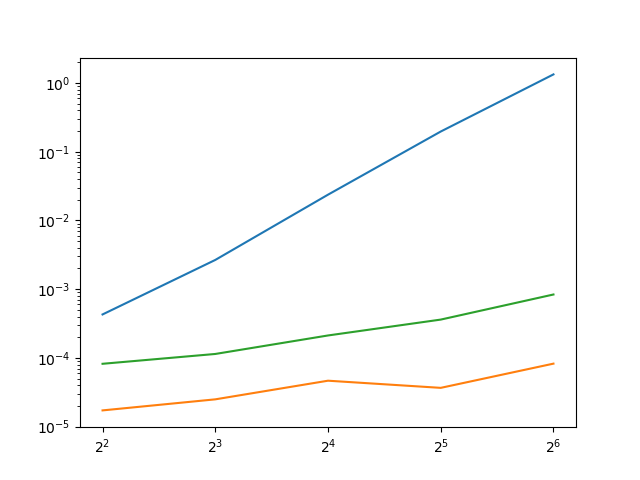

<IPython.core.display.Javascript object>


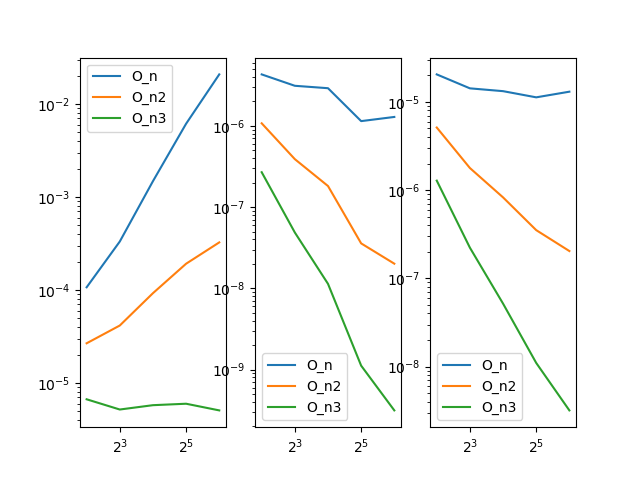

4 | 0.00042854666668669476 | 1.7213985969888866e-05 | 8.205301202840665e-05
8 | 0.002661200000147801 | 2.4929268261260632e-05 | 0.0001140405404569449
16 | 0.023702299999058596 | 4.655648156888977e-05 | 0.0002119380953358597
32 | 0.1965782000006584 | 3.6635483724317984e-05 | 0.00036073333330932655
64 | 1.333162299999458 | 8.246301353808607e-05 | 0.0008361264708582894


In [109]:
testCycle([DFT2_brute_force, fft2, fft_2d], start=2**2, end=2**6, samples=1, verbose=True);

Compare `fft2` from NumPy with the own `fft_2d` which uses fft from Numpy:

<IPython.core.display.Javascript object>


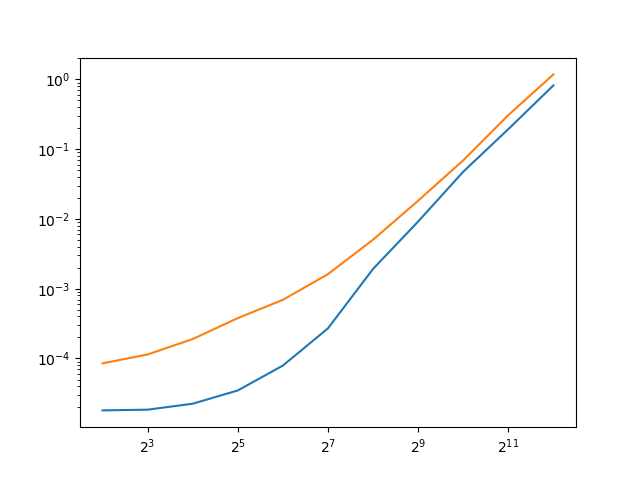

<IPython.core.display.Javascript object>


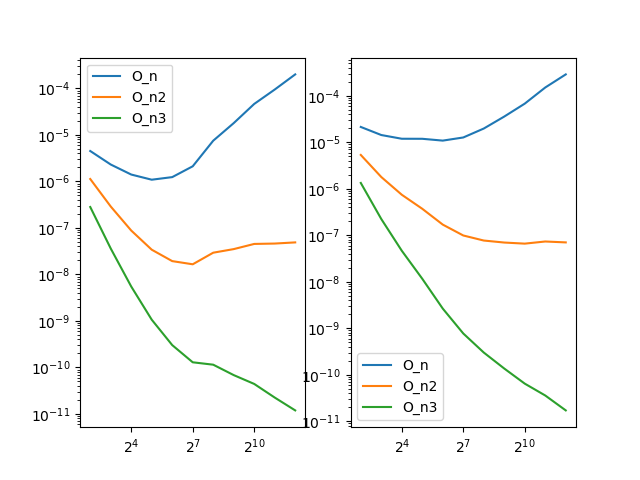

4 | 1.8043111906029863e-05 | 8.524710985357564e-05
8 | 1.8477373644067295e-05 | 0.00011426449109783998
16 | 2.2500447231918367e-05 | 0.00019010603933678426
32 | 3.48597195538239e-05 | 0.0003793195255639148
64 | 7.924885633840127e-05 | 0.0006934541885196539
128 | 0.000270904387564402 | 0.0016194000001632958
256 | 0.0019238999999288352 | 0.0050425599994923685
512 | 0.009194120000029216 | 0.01826203999971767
1024 | 0.04749876000005315 | 0.06921308000000863
2048 | 0.19363954999989802 | 0.307747400000153
4096 | 0.8199781199999052 | 1.1772025500002201


In [110]:
testCycle([fft2, fft_2d], start=2**2, end=2**12, samples=10, verbose=True);